In [26]:
import  os

In [27]:
from dotenv import load_dotenv
load_dotenv()

True

In [28]:
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [29]:

from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro-latest")

In [30]:
from typing import Annotated
from typing import Literal
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.tools import tool
from langchain_experimental.utilities import PythonREPL
from typing_extensions import TypedDict
from langgraph.graph import MessagesState, END,StateGraph, START
from langgraph.types import Command
from langchain_core.messages import HumanMessage,SystemMessage
from langgraph.prebuilt import create_react_agent


In [31]:
llm.invoke("hi")

AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-pro-002', 'safety_ratings': []}, id='run--89f5b6b5-77df-4ec2-983b-3e355c7e06a5-0', usage_metadata={'input_tokens': 1, 'output_tokens': 11, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}})

In [32]:
@tool
def contact_recipient_via_chat():
    """
    Contacts the recipient via chat to provide updates or gather information. this will start a chat between the recipient and the delivery boy.
    """
    # Implementation for contacting the recipient via chat
    pass

@tool
def suggest_drop_off():
    """
    if the user uses this  tool then  the agent will suggest a drop-off location fot the delivery.
    """
    # Implementation for suggesting a drop-off location
    pass

@tool
def find_nearby_locker():
    """
    Finds a nearby locker for the delivery.
    """
    # Implementation for finding a nearby locker
    pass


In [33]:
tools=[contact_recipient_via_chat, suggest_drop_off, find_nearby_locker]

In [34]:
llm_with_tools=llm.bind_tools(tools)

In [35]:
class State(MessagesState):
    next:str

In [36]:
# System message
sys_msg = SystemMessage(content="You are a helpful assistant who ensure that the delivery is done safely if the user is not present there.")
     

In [37]:
def grab_express(state: State) -> dict:
    """
    ReAct agent for handling express deliveries when the recipient is not present.
    Uses tools to contact the recipient, suggest drop-off locations, and find nearby lockers.
    
    Args:
        state: The current state including messages
        
    Returns:
        Updated state with new messages
    """
    # Create a ReAct agent that can use our tools
    agent = create_react_agent(llm, tools, sys_msg.content)
    
    # Invoke the agent with the current messages
    result = agent.invoke(state["messages"])
    
    # Return the updated messages
    return {"messages": state["messages"] + [result]}

In [38]:
graph = StateGraph(State)

In [39]:
# Add the grab_express node to the graph
graph.add_node("grab_express", grab_express)

# Set the entry point
graph.set_entry_point("grab_express")

# Compile the graph
app = graph.compile()

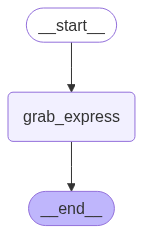

In [42]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

In [40]:
# Test example - uncomment to run
# inputs = {"messages": [HumanMessage(content="I'm trying to deliver a package but the recipient isn't home. What should I do?")]}
# result = app.invoke(inputs)
# print(result["messages"][-1].content)